In [1]:
# This tutorial will briefly show the main components of the aerodynamic reduced order model.
# We will create the database, create the physical model, and finally use them to plot the training signal
# that has been used, and the corresponding lift coefficient obtained.
# After the completion of this tutorial you should be able to manipulate the training data to extract and
# plot quantities of interest.

In [2]:
# First, we perform the aerodynamic simulation with SU2. Please refer to the tutorial at 
# https://su2code.github.io/tutorials/Dynamic_FSI_Python/ for more details.

In [3]:
# Assuming that we correctly configured the SU2 simulation, we now have this list of output files:
# 1) The StructHistoryModal.dat file, containing the structural inputs that we provided to the system
# 2) A set of surface_flow.csv files, containing the aerodynamic solution at each time step of the training process

In [4]:
# Second, we launch again the same aerodynamic simulation, this time including the keyword "MAPPING_MODES = YES" in
# solid.cfg file. This will not actually run the simulation, but only print the normals and the modal shapes.

In [5]:
# If everything was correctly configured, we now have these files:
# 1) A file called Normals.csv, containing the normal to all the surface cells. Please note that the norm of these normals
# correspond to the area of the cell
# 2) A file called Undeformed.csv, containing the position of the cells in the undeformed configuration
# 3) A se of files called Mode.csv, containing the positions of the cells for the different modal shapes

In [6]:
# We are now ready to build our database.

# import the aerodynamic module
import os
os.chdir("..")
import aerodynamics
os.chdir("Tutorials")

# location of the structural history file
stru_history = "/mnt/y/SU2/BSCW/DMD_training/blendedStep/StructHistoryModal.dat"

# location of the aerodynamic history files
aero_history = "/mnt/y/SU2/BSCW/DMD_training/blendedStep/surface_flow.csv"
# note that all the files are called surface_flow_00xxx.csv, with xxx the time iteration
# it is sufficient to put the main name, the code will then scan for the requested time iterations

In [7]:
# creation of the database
database = aerodynamics.database(stru_history,aero_history)

Creating the database for the reduced order model.
Importing the data from the files.
Opened structural history file /mnt/y/SU2/BSCW/DMD_training/blendedStep/StructHistoryModal.dat.
Completed reading
Starting the reading of surface_flow.csv files.
Opened file 99 of 1099
Opened file 100 of 1099
Opened file 101 of 1099
Opened file 102 of 1099
Opened file 103 of 1099
Opened file 104 of 1099
Opened file 105 of 1099
Opened file 106 of 1099
Opened file 107 of 1099
Opened file 108 of 1099
Opened file 109 of 1099
Opened file 110 of 1099
Opened file 111 of 1099
Opened file 112 of 1099
Opened file 113 of 1099
Opened file 114 of 1099
Opened file 115 of 1099
Opened file 116 of 1099
Opened file 117 of 1099
Opened file 118 of 1099
Opened file 119 of 1099
Opened file 120 of 1099
Opened file 121 of 1099
Opened file 122 of 1099
Opened file 123 of 1099
Opened file 124 of 1099
Opened file 125 of 1099
Opened file 126 of 1099
Opened file 127 of 1099
Opened file 128 of 1099
Opened file 129 of 1099
Opened fi

Opened file 431 of 1099
Opened file 432 of 1099
Opened file 433 of 1099
Opened file 434 of 1099
Opened file 435 of 1099
Opened file 436 of 1099
Opened file 437 of 1099
Opened file 438 of 1099
Opened file 439 of 1099
Opened file 440 of 1099
Opened file 441 of 1099
Opened file 442 of 1099
Opened file 443 of 1099
Opened file 444 of 1099
Opened file 445 of 1099
Opened file 446 of 1099
Opened file 447 of 1099
Opened file 448 of 1099
Opened file 449 of 1099
Opened file 450 of 1099
Opened file 451 of 1099
Opened file 452 of 1099
Opened file 453 of 1099
Opened file 454 of 1099
Opened file 455 of 1099
Opened file 456 of 1099
Opened file 457 of 1099
Opened file 458 of 1099
Opened file 459 of 1099
Opened file 460 of 1099
Opened file 461 of 1099
Opened file 462 of 1099
Opened file 463 of 1099
Opened file 464 of 1099
Opened file 465 of 1099
Opened file 466 of 1099
Opened file 467 of 1099
Opened file 468 of 1099
Opened file 469 of 1099
Opened file 470 of 1099
Opened file 471 of 1099
Opened file 472 

Opened file 773 of 1099
Opened file 774 of 1099
Opened file 775 of 1099
Opened file 776 of 1099
Opened file 777 of 1099
Opened file 778 of 1099
Opened file 779 of 1099
Opened file 780 of 1099
Opened file 781 of 1099
Opened file 782 of 1099
Opened file 783 of 1099
Opened file 784 of 1099
Opened file 785 of 1099
Opened file 786 of 1099
Opened file 787 of 1099
Opened file 788 of 1099
Opened file 789 of 1099
Opened file 790 of 1099
Opened file 791 of 1099
Opened file 792 of 1099
Opened file 793 of 1099
Opened file 794 of 1099
Opened file 795 of 1099
Opened file 796 of 1099
Opened file 797 of 1099
Opened file 798 of 1099
Opened file 799 of 1099
Opened file 800 of 1099
Opened file 801 of 1099
Opened file 802 of 1099
Opened file 803 of 1099
Opened file 804 of 1099
Opened file 805 of 1099
Opened file 806 of 1099
Opened file 807 of 1099
Opened file 808 of 1099
Opened file 809 of 1099
Opened file 810 of 1099
Opened file 811 of 1099
Opened file 812 of 1099
Opened file 813 of 1099
Opened file 814 

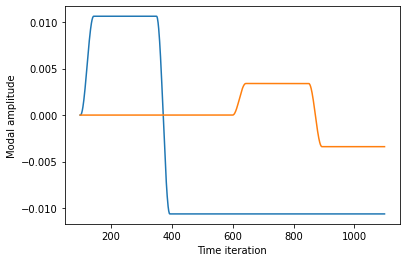

In [12]:
# plot of the training signals, per each mode
import matplotlib.pyplot as plt
nModes = database.U.shape[0]
for i in range(nModes):
    plt.plot(database.timeIter, database.U[i,:]) # Each row is a different mode, each column a time iteration
    
# just make the plot pretty
plt.xlabel("Time iteration")
plt.ylabel("Modal amplitude")
legend = ["Mode {}".format(int(i+1)) for i in range(nModes)]

In [13]:
# We now want to plot the lift obtained with these inputs
# In order to do so we need a physical model of the system, to connect
# the database, containing a list of pressure values, with the application
# points of these pressures, and the direction of application to the surface
model = aerodynamics.physicalModel("/mnt/y/SU2/BSCW/mappedModes/Normals.csv","/mnt/y/SU2/BSCW/mappedModes/Mode.csv")
# Note that again we have more mode files, Mode0.csv, Mode1.csv, ecc... so we only give the main name

Creating the physical model.
Importing the data from the files.
Obtaining the normals to the different panels.
Completed reading
Obtaining the mode shapes
Starting with the undeformed condition
Obtain now the deformation due to modes
Completed reading
Done


Text(0, 0.5, 'Lift [N]')

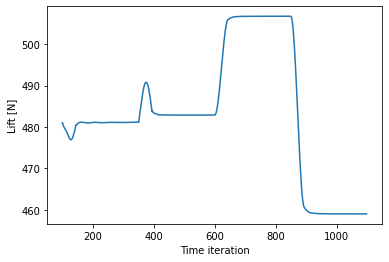

In [14]:
import numpy as np
# plot of the lift
nTimeIter = database.X.shape[1]
lift = []
for i in range(nTimeIter):
    lift = np.append(lift, model.getCl(database.X[:,i]))

plt.plot(database.timeIter, lift)
# just make the plot pretty
plt.xlabel("Time iteration")
plt.ylabel("Lift [N]")

In [15]:
# We will now perform the SVD of the aerodynamic state
U, S, VT, Xmean = database.getShiftedStateSVD()

In [16]:
# The code will automatically apply an optimal threshold to cut the dimension of the matrices
U.shape

(86840, 999)

Text(0.5, 0, 'Index')

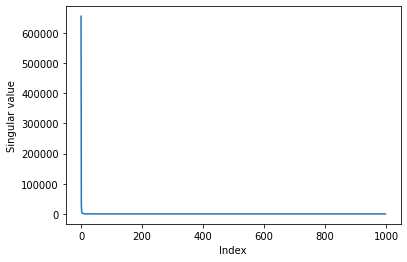

In [17]:
# You can see that it is NOT working, as all the modes are retained (the state dimension is 86840, and the snapshots are 999)
# In order to check the singular values we can plot them
plt.plot(np.diag(S))
plt.ylabel("Singular value")
plt.xlabel("Index")

Text(0.5, 0, 'Index')

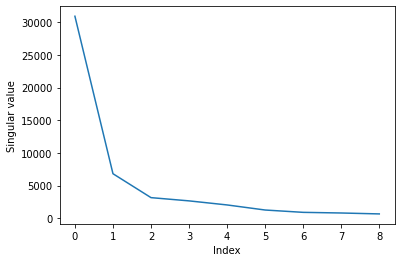

In [18]:
# They actually decrease extremely rapidly. If we focus on the first indices
plt.plot(np.diag(S)[1:10])
plt.ylabel("Singular value")
plt.xlabel("Index")

In [19]:
# The optimal cutting point is computed using Gavish and Donoho, and we can obtain this threshold as
tsh = database.getOptimalThreshold(S)
tsh

0.18897327290295363

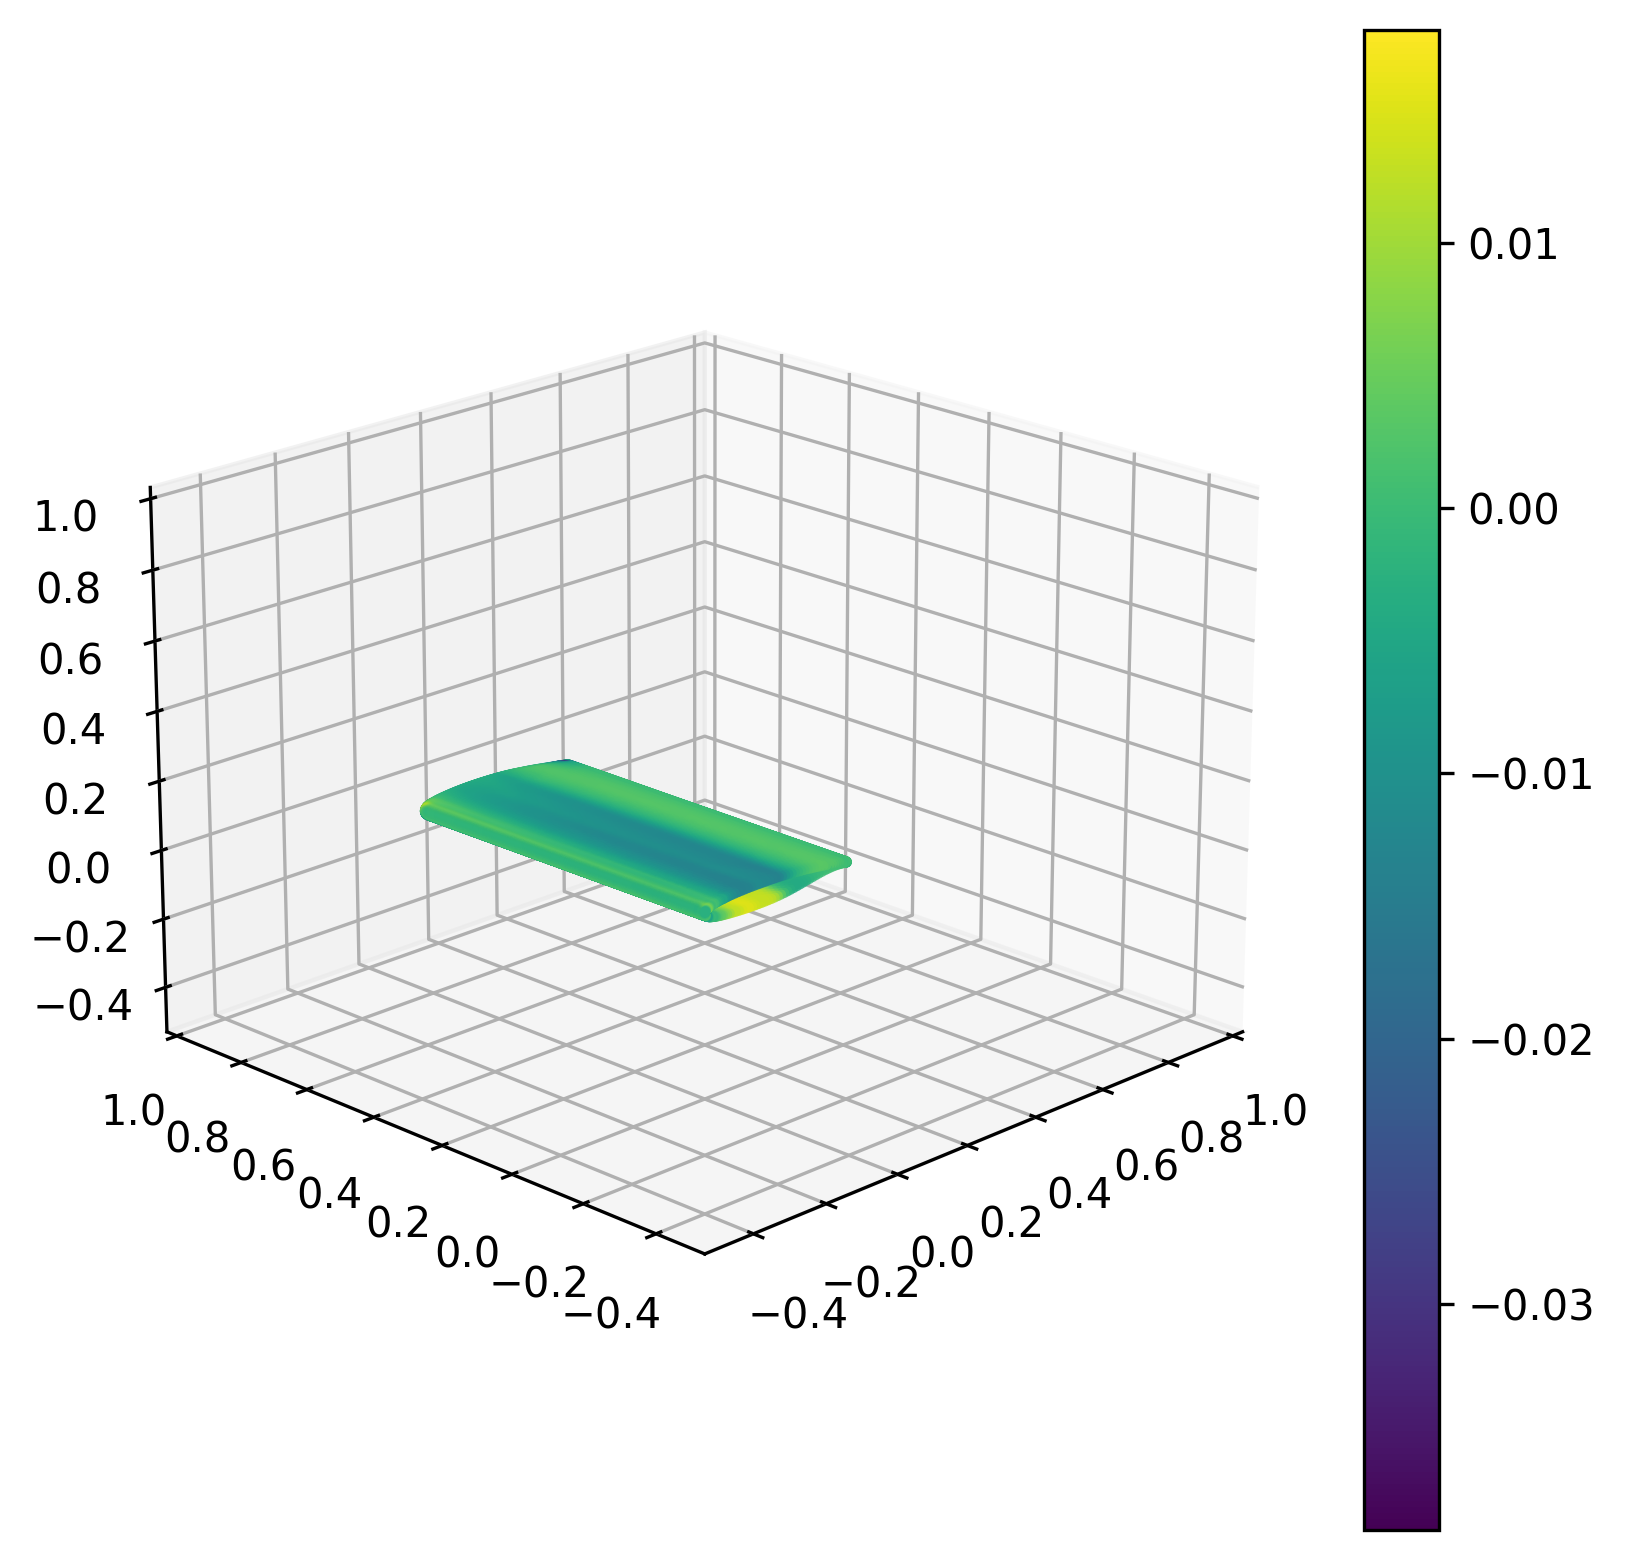

In [20]:
# We will now plot the first of the PODs, to verify the behaviour
from mpl_toolkits.mplot3d import Axes3D

sizeseq = 2

fig = plt.figure(1, (5,5), dpi=300)
ax = Axes3D(fig)
ax.view_init(20, 225)

undeformedx = []
undeformedy = []
undeformedz = []
for i in range(len(model.undeformedShape)):
    undeformedx.append(model.undeformedShape[i].ux)
    undeformedy.append(model.undeformedShape[i].uy)
    undeformedz.append(model.undeformedShape[i].uz)

p = ax.scatter(undeformedx, undeformedy, undeformedz, c = U[:,1], s=sizeseq)

ax.axes.set_xlim3d(left=-0.5, right=1) 
ax.axes.set_ylim3d(bottom=-0.5, top=1) 
ax.axes.set_zlim3d(bottom=-0.5, top=1)

fig.colorbar(p)

plt.show()

In [21]:
# As a final step, we can build the aerodynamic ROM. This contains the matrices A and B that are used
# to advance the system in time following x^n+1 = Ax^n + Bu^n
rom = aerodynamics.ROM([database],model)

In [22]:
# We can now compute the eigenvalues of the A matrix
w, v = np.linalg.eig(rom.A)

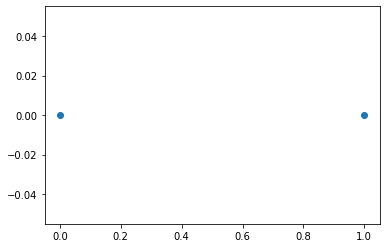

In [31]:
# We now plot the real and imaginary parts
plt.scatter(w[0:2].real,w[0:2].imag)